In [1]:
#!pip install -r "C:\Users\John\Desktop\requirements.txt"

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Data Collection

In [6]:
#df = pd.read_csv('/kaggle/input/traffic-prediction-dataset/Traffic.csv')
df = pd.read_csv(r"C:\Users\John\Desktop\PR-CL-Traffic_prediction\Traffic.csv")

In [7]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


# Cleaning

## Feature conversion to numerical

In [9]:
# col Time
from datetime import datetime

df['Time'] = [pd.to_datetime(x, format='%I:%M:%S %p') for x in df['Time']]
df['Time'] = [x.timestamp() for x in df['Time']]

In [10]:
# col Day of the week
df = pd.get_dummies(df, columns=['Day of the week'], dtype=int)

# Target conversion tu numerical

In [11]:
le = LabelEncoder()
df['Traffic Situation'] = le.fit_transform(df['Traffic Situation'])

In [12]:
df

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Day of the week_Friday,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
0,-2.208989e+09,10,31,0,4,4,39,2,0,0,0,0,0,1,0
1,-2.208988e+09,10,49,0,3,3,55,2,0,0,0,0,0,1,0
2,-2.208987e+09,10,46,0,3,6,55,2,0,0,0,0,0,1,0
3,-2.208986e+09,10,51,0,2,5,58,2,0,0,0,0,0,1,0
4,-2.208985e+09,10,57,6,15,16,94,3,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,-2.208907e+09,9,16,3,1,36,56,3,0,0,0,0,1,0,0
2972,-2.208906e+09,9,11,0,1,30,42,3,0,0,0,0,1,0,0
2973,-2.208905e+09,9,15,4,1,25,45,3,0,0,0,0,1,0,0
2974,-2.208904e+09,9,16,5,0,27,48,3,0,0,0,0,1,0,0


# Univariate Analysis

In [13]:
df.describe()

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Day of the week_Friday,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
count,2.976000e+03,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.00000,2976.00000,2976.00000
mean,-2.208946e+09,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414,1.994624,0.129032,0.129032,0.129032,0.129032,0.16129,0.16129,0.16129
std,2.494437e+04,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627,1.259307,0.335292,0.335292,0.335292,0.335292,0.36786,0.36786,0.36786
min,-2.208989e+09,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
25%,-2.208967e+09,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
50%,-2.208946e+09,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
75%,-2.208925e+09,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
max,-2.208903e+09,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000


# Bivariate Analysis

In [14]:
# correlation between variables
#sns.set()
#sns.pairplot(df, hue='Traffic Situation', kind='reg')

In [15]:
# correlation with dataset - target value
df.corr()['Traffic Situation']

Time                        -0.125948
Date                         0.008981
CarCount                    -0.748104
BikeCount                   -0.616036
BusCount                    -0.704608
TruckCount                   0.495718
Total                       -0.781925
Traffic Situation            1.000000
Day of the week_Friday      -0.015870
Day of the week_Monday      -0.003133
Day of the week_Saturday     0.016769
Day of the week_Sunday      -0.007113
Day of the week_Thursday     0.007677
Day of the week_Tuesday     -0.000304
Day of the week_Wednesday    0.001147
Name: Traffic Situation, dtype: float64

In [16]:
# full correlation table
df.corr().style.background_gradient(cmap='viridis')

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Day of the week_Friday,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
Time,1.000000,-0.000000,0.147830,0.140112,0.164964,-0.016984,0.178832,-0.125948,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000
Date,-0.000000,1.000000,-0.013453,-0.005089,-0.015536,0.024734,-0.010679,0.008981,-0.010758,0.118341,0.043033,0.064550,-0.117670,0.088252,-0.166699
CarCount,0.147830,-0.013453,1.000000,0.722539,0.692994,-0.628157,0.970443,-0.748104,0.002154,-0.010637,0.001454,-0.006767,-0.005388,0.009001,0.008961
BikeCount,0.140112,-0.005089,0.722539,1.000000,0.566364,-0.575399,0.797429,-0.616036,0.212538,-0.051833,-0.008135,-0.034198,-0.037505,-0.037932,-0.032455
BusCount,0.164964,-0.015536,0.692994,0.566364,1.000000,-0.546931,0.790705,-0.704608,-0.189665,0.023671,0.019827,0.021505,0.044140,0.030697,0.038788
TruckCount,-0.016984,0.024734,-0.628157,-0.575399,-0.546931,1.000000,-0.555471,0.495718,-0.188024,0.031031,0.035947,0.046631,0.023269,0.007758,0.036798
Total,0.178832,-0.010679,0.970443,0.797429,0.790705,-0.555471,1.000000,-0.781925,-0.031310,-0.008059,0.010429,0.000885,0.002507,0.007441,0.015624
Traffic Situation,-0.125948,0.008981,-0.748104,-0.616036,-0.704608,0.495718,-0.781925,1.000000,-0.015870,-0.003133,0.016769,-0.007113,0.007677,-0.000304,0.001147
Day of the week_Friday,0.000000,-0.010758,0.002154,0.212538,-0.189665,-0.188024,-0.031310,-0.015870,1.000000,-0.148148,-0.148148,-0.148148,-0.168790,-0.168790,-0.168790
Day of the week_Monday,0.000000,0.118341,-0.010637,-0.051833,0.023671,0.031031,-0.008059,-0.003133,-0.148148,1.000000,-0.148148,-0.148148,-0.168790,-0.168790,-0.168790


# Scale

In [17]:
df_scaled = df.copy()
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled),columns=df.columns)
df_scaled['Traffic Situation'] = df['Traffic Situation']
df_scaled.head()

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Day of the week_Friday,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
0,-1.000000,-0.375,-0.375000,-0.705882,-0.333333,-0.588235,-0.642202,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.978947,-0.375,-0.170455,-0.705882,-0.375000,-0.647059,-0.495413,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.957895,-0.375,-0.204545,-0.705882,-0.375000,-0.470588,-0.495413,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.936842,-0.375,-0.147727,-0.705882,-0.416667,-0.529412,-0.467890,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.915789,-0.375,-0.079545,-0.352941,0.125000,0.117647,-0.137615,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Balance Data

In [18]:
from sklearn.utils import resample
df['Traffic Situation'].value_counts()

3    1669
0     682
1     321
2     304
Name: Traffic Situation, dtype: int64

In [19]:
!pip install imblearn

In [20]:
from imblearn.over_sampling import SMOTE

# Supposons que df est votre DataFrame
X = df_scaled.drop('Traffic Situation', axis=1)  # Les caractéristiques
y = df_scaled['Traffic Situation']  # La colonne de classe

# Créez un échantillonneur SMOTE
smote = SMOTE(random_state=42)

# Appliquez SMOTE pour équilibrer les données
X_resampled, y_resampled = smote.fit_resample(X, y)

# Créez un nouveau DataFrame avec les données équilibrées
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

In [21]:
balanced_df['Traffic Situation'].value_counts()

2    1669
3    1669
0    1669
1    1669
Name: Traffic Situation, dtype: int64

# Train/Test

In [22]:
X = balanced_df.drop(columns = 'Traffic Situation')
y = balanced_df['Traffic Situation']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (5340, 14)
Test values shape: (1336, 14)
Train target shape: (5340,)
Test target shape: (1336,)


# Model selection

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [25]:
import mlflow
import mlflow.sklearn
#mlflow server --host 0.0.0.0 --port 5000
#!mlflow ui

In [26]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
with mlflow.start_run():
    mlflow.log_params({
        'n_estimators': 100,
        'random_state': 42
    })

    mlflow.sklearn.log_model(model, 'random_forest_model')

    # Calculate and log metrics (e.g., accuracy)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metrics({'accuracy': accuracy})
mlflow.end_run()

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [29]:
import pycaret.classification as pc

In [30]:
dataset = balanced_df
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (6008, 15)
Unseen Data For Predictions: (668, 15)


In [31]:
exp_mclf = pc.setup(data = balanced_df, target = 'Traffic Situation', session_id=123) 

,Description,Value
0,Session id,123
1,Target,Traffic Situation
2,Target type,Multiclass
3,Original data shape,"(6676, 15)"
4,Transformed data shape,"(6676, 15)"
5,Transformed train set shape,"(4673, 15)"
6,Transformed test set shape,"(2003, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [32]:
pc.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9983,1.0000,0.9983,0.9983,0.9983,0.9977,0.9977,3.0570
dt,Decision Tree Classifier,0.9974,0.9983,0.9974,0.9975,0.9974,0.9966,0.9966,0.0310
rf,Random Forest Classifier,0.9966,0.9999,0.9966,0.9966,0.9966,0.9954,0.9955,0.3790
lightgbm,Light Gradient Boosting Machine,0.9957,1.0000,0.9957,0.9958,0.9957,0.9943,0.9943,0.6560
et,Extra Trees Classifier,0.9833,0.9991,0.9833,0.9836,0.9832,0.9777,0.9779,0.2640
lr,Logistic Regression,0.9123,0.9839,0.9123,0.9122,0.9110,0.8830,0.8838,0.6600
knn,K Neighbors Classifier,0.9033,0.9820,0.9033,0.9082,0.9000,0.8710,0.8744,0.0610
svm,SVM - Linear Kernel,0.8703,0.0000,0.8703,0.8776,0.8644,0.8271,0.8323,0.0490
lda,Linear Discriminant Analysis,0.8594,0.9735,0.8594,0.8642,0.8553,0.8125,0.8162,0.0310
ridge,Ridge Classifier,0.7991,0.0000,0.7991,0.8267,0.7846,0.7321,0.7454,0.0270


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [33]:
gbc = pc.create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9957,1.0000,0.9957,0.9958,0.9957,0.9943,0.9943
2,0.9957,1.0000,0.9957,0.9958,0.9957,0.9943,0.9943
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9957,1.0000,0.9957,0.9958,0.9957,0.9943,0.9943
5,0.9979,1.0000,0.9979,0.9979,0.9979,0.9971,0.9972
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9979,1.0000,0.9979,0.9979,0.9979,0.9971,0.9972
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [34]:
# Prediction avec le modèle non entraîné sur les données de validation (shape 2003)
pred_base = pc.predict_model(gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9990,1.0000,0.9990,0.9990,0.9990,0.9987,0.9987


In [35]:
pred_base.shape

(2003, 17)

In [36]:
# On entraîne le modèle (cross validation train/test)
gbc = pc.tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9979,1.0000,0.9979,0.9979,0.9979,0.9972,0.9972
1,0.9957,1.0000,0.9957,0.9958,0.9957,0.9943,0.9943
2,0.9979,0.9999,0.9979,0.9979,0.9979,0.9972,0.9972
3,0.9957,1.0000,0.9957,0.9958,0.9957,0.9943,0.9943
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9979,1.0000,0.9979,0.9979,0.9979,0.9971,0.9972
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9957,1.0000,0.9957,0.9958,0.9957,0.9943,0.9943
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [37]:
pred_tuned = pc.predict_model(gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9990,1.0000,0.9990,0.9990,0.9990,0.9987,0.9987


In [38]:
y_pred_tuned = pred_tuned['prediction_label']
y_val = pred_tuned['Traffic Situation']

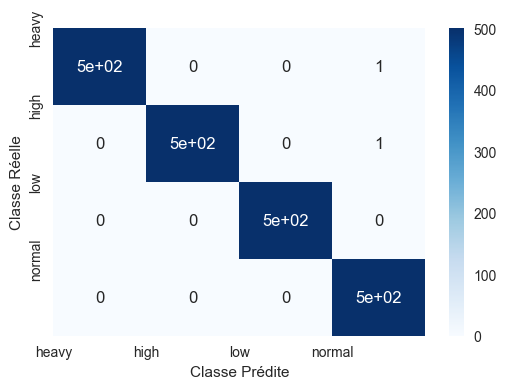

In [39]:
# Matrice de confusion (données de validation)
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_val, y_pred_tuned)#, normalize = 'true')
plt.figure(figsize = (6,4))
sns.heatmap(conf_mat, annot=True, cmap="Blues")

# Redéfinissez les étiquettes des axes x et y
new_xticklabels = le.inverse_transform([0,1,2,3])
new_yticklabels = le.inverse_transform([0,1,2,3])

plt.xticks(range(len(new_xticklabels)), new_xticklabels)
plt.yticks(range(len(new_yticklabels)), new_yticklabels)

# Donnez un nom à chaque axe
plt.xlabel("Classe Prédite")
plt.ylabel("Classe Réelle")

# Affichez la heatmap
plt.show()